Downloaded the dataset from kaggle.
There R represent rocks and M represents mines.

In [ ]:
#Importing the dependencies
import numpy as np    #for arrays
import pandas as pd   #for loading our data into dataframes
from sklearn.model_selection import train_test_split #We have to split our data into
#training and testing
from sklearn.linear_model import LogisticRegression #Logistic regression
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Data collection and Data processing

In [ ]:
#loading the dataset to a pandas dataframe
sonar_data = pd.read_csv('/content/sonar data.csv', header=None)
#As we don't have any header in our file, so we will mention header='None'. Header is basically
#the name of our columns

In [ ]:
#To print the first 5 rows of our dataset
sonar_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [ ]:
#number of rows and columns
sonar_data.shape

(208, 61)

Here 208 means there are 208 instances of the data and there are 60 features for a particular rock. The last column is the output.

In [ ]:
sonar_data.describe() #describe gives statistical measures of the data

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


25% means that 25% of the values are less than 0.013350, 50% of the values are less than 0.022800 and so on.

In [ ]:
sonar_data[60].value_counts()

,count
60,
M,111
R,97


If we have almost equal number of examples for both the categories then our prediction will be very good. Incase of M 1000 and R 500, the prediction won't be that good.

More the data, more will be the accuracy.

In [ ]:
sonar_data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


For the 0th column, the mean value of Mine is 0.034989 and Rock is 0.022498.

In [ ]:
#Seperating the data and labels (rock and mine) because this is a supervised learning model
X = sonar_data.drop(columns=60, axis=1) #for row, axis is 0 but here we are dropping the column
Y = sonar_data[60]

In [ ]:
print(X)
print(Y)

         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      50      51      52      53   

Now we will split this data into training and testing data.

In [ ]:
#There are certain parameters of function train_test_split()
#test_size=0.1 means we need 10% of the data to be test data. So if we have a dataset of 200 rows, then 20 rows will be test data.
#stratify -> In the train_test_split function, the stratify parameter is used to ensure that the resulting training and testing sets have the same proportion of samples from each class
#as the original dataset.
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, stratify=Y, random_state=1)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(208, 60) (187, 60) (21, 60)


In [ ]:
print(X_train)
print(Y_train)

         0       1       2       3       4       5       6       7       8   \
115  0.0414  0.0436  0.0447  0.0844  0.0419  0.1215  0.2002  0.1516  0.0818   
38   0.0123  0.0022  0.0196  0.0206  0.0180  0.0492  0.0033  0.0398  0.0791   
56   0.0152  0.0102  0.0113  0.0263  0.0097  0.0391  0.0857  0.0915  0.0949   
123  0.0270  0.0163  0.0341  0.0247  0.0822  0.1256  0.1323  0.1584  0.2017   
18   0.0270  0.0092  0.0145  0.0278  0.0412  0.0757  0.1026  0.1138  0.0794   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
140  0.0412  0.1135  0.0518  0.0232  0.0646  0.1124  0.1787  0.2407  0.2682   
5    0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   
154  0.0117  0.0069  0.0279  0.0583  0.0915  0.1267  0.1577  0.1927  0.2361   
131  0.1150  0.1163  0.0866  0.0358  0.0232  0.1267  0.2417  0.2661  0.4346   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   

         9   ...      50      51      52      53   

Model training -> logistic regression

In [ ]:
#This will load logistic regression function into variable model
model = LogisticRegression()

In [ ]:
#training the logistic regression model with training data
#To fit the training data in the model
model.fit(X_train, Y_train)

LogisticRegression()

Model Evaluation

In [ ]:
#We have imported accuracy_score function for the accuracy
#Most of the times accuracy on training data is more than testing data.
#As in this model we have used less data number of data points, so its accuracy can be low.
#Any accuracy > 70% is good.
#Accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
#We are comparing the prediction of our model and the original label of the training data.

In [ ]:
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.8342245989304813


In [ ]:
#Accuracy on test data
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy on testing data : ', testing_data_accuracy)

Accuracy on testing data :  0.7619047619047619


This means out of 100 times, it can correctly predict 76 times whether it is a rock or mine.

Making a predictive system

In [ ]:
#We can open the csv file in text and copy some values for input_data
input_data = (0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,0.2988,0.4250,0.6343,0.8198,1.0000,0.9988,0.9508,0.9025,0.7234,0.5122,0.2074,0.3985,0.5890,0.2872,0.2043,0.5782,0.5389,0.3750,0.3411,0.5067,0.5580,0.4778,0.3299,0.2198,0.1407,0.2856,0.3807,0.4158,0.4054,0.3296,0.2707,0.2650,0.0723,0.1238,0.1192,0.1089,0.0623,0.0494,0.0264,0.0081,0.0104,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062)

#changing the input data list into numpy array for fast processing
input_data_as_numpy_array = np.asarray(input_data)

#Reshaping our numpy array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

#as prediction is a list so we are obtaining the value by indexing
if(prediction[0]=='R'):
  print('The object is a Rock')
else:
  print('The object is a Mine')


['R']
The object is a Rock


In [ ]:
#We can open the csv file in text and copy some values for input_data
input_data = (0.0201,0.0178,0.0274,0.0232,0.0724,0.0833,0.1232,0.1298,0.2085,0.2720,0.2188,0.3037,0.2959,0.2059,0.0906,0.1610,0.1800,0.2180,0.2026,0.1506,0.0521,0.2143,0.4333,0.5943,0.6926,0.7576,0.8787,0.9060,0.8528,0.9087,0.9657,0.9306,0.7774,0.6643,0.6604,0.6884,0.6938,0.5932,0.5774,0.6223,0.5841,0.4527,0.4911,0.5762,0.5013,0.4042,0.3123,0.2232,0.1085,0.0414,0.0253,0.0131,0.0049,0.0104,0.0102,0.0092,0.0083,0.0020,0.0048,0.0036)

#changing the input data list into numpy array for fast processing
input_data_as_numpy_array = np.asarray(input_data)

#Reshaping our numpy array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

#as prediction is a list so we are obtaining the value by indexing
if(prediction[0]=='R'):
  print('The object is a Rock')
else:
  print('The object is a Mine')

['M']
The object is a Mine


k-Nearest Neighbors (kNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(1, 14)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))


Train kNN Model

In [ ]:
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    train_accuracy[i] = knn.score(X_train, Y_train)
    test_accuracy[i] = knn.score(X_test, Y_test)


Plot Results

Visualize accuracy for different neighbor values to select the best k.

In [ ]:
import matplotlib.pyplot as plt


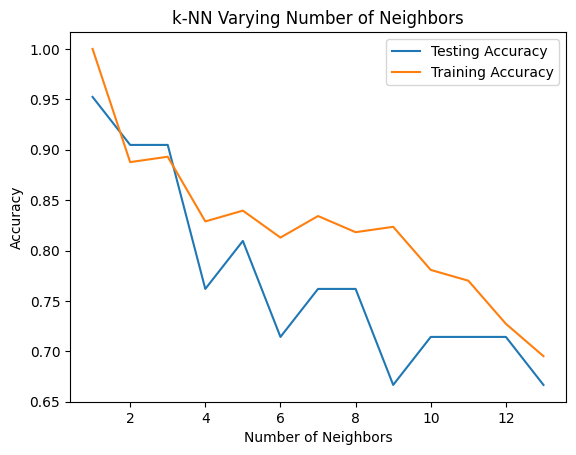

In [ ]:
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('k-NN Varying Number of Neighbors')
plt.legend()
plt.show()


Final kNN Model



In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, Y_train)
y_pred_knn = knn.predict(X_test)


Logistic Regression

Fit a logistic regression model to the training data

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)
y_pred_logistic = model.predict(X_test)


Principal Component Analysis (PCA)

Reduce the feature dimensions using PCA and fit a Logistic Regression model to the reduced features.

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [ ]:
from sklearn.decomposition import PCA


In [ ]:
# Initialize PCA and reduce the number of components
pca = PCA(n_components=10)  # Adjust the number of components as needed
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train Logistic Regression model on PCA-transformed data
model_pca = LogisticRegression()
model_pca.fit(X_train_pca, Y_train)

# Make predictions
y_pred_pca = model_pca.predict(X_test_pca)


Support Vector Machines (SVM)

Train and evaluate an SVM model for classification.
Fit an SVM model to the original features and the PCA-reduced features.

In [ ]:
# Train SVM model on original features
svm = SVC(kernel='linear')  # You can use different kernels like 'rbf' as well
svm.fit(X_train, Y_train)

# Make predictions
y_pred_svm = svm.predict(X_test)



Model Evaluation
Check the performance of the trained models.

Evaluate kNN

Compute the accuracy of the kNN model on the test set

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
print("kNN Accuracy:", accuracy_score(Y_test, y_pred_knn))


kNN Accuracy: 0.9047619047619048


ACCURACY = 90.47%

Confusion Matrix

Display the confusion matrix to understand prediction results.

In [ ]:
print("kNN Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred_knn))


kNN Confusion Matrix:
[[11  0]
 [ 2  8]]


Evaluate Logistic Regression

Compute the accuracy of the logistic regression model.

In [ ]:
print("Logistic Regression Accuracy:", accuracy_score(Y_test, y_pred_logistic))


Logistic Regression Accuracy: 0.7619047619047619


Confusion Matrix

Show the confusion matrix for logistic regression results.

In [ ]:
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred_logistic))


Logistic Regression Confusion Matrix:
[[9 2]
 [3 7]]


Evaluate the PCA-based model

In [ ]:
# Evaluate the PCA-based model
print("PCA + Logistic Regression Accuracy:", accuracy_score(Y_test, y_pred_pca))
print("PCA + Logistic Regression Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred_pca))


PCA + Logistic Regression Accuracy: 0.6190476190476191
PCA + Logistic Regression Confusion Matrix:
[[7 4]
 [4 6]]


Evaluate the SVM model

In [ ]:
# Evaluate the SVM model
print("SVM Accuracy:", accuracy_score(Y_test, y_pred_svm))
print("SVM Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred_svm))


SVM Accuracy: 0.7142857142857143
SVM Confusion Matrix:
[[8 3]
 [3 7]]


Conclusion:

In this project, the k-Nearest Neighbors (kNN) algorithm demonstrated better performance compared to Logistic Regression in classifying sonar data into rocks and mines. The accuracy of the kNN model was higher, making it a more suitable choice for this task.

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

input_dim = X_train.shape[1]
encoding_dim = 14

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="relu")(input_layer)
decoder = Dense(input_dim, activation="sigmoid")(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, shuffle=True, validation_split=0.2)


Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.1268 - val_loss: 0.1271
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1220 - val_loss: 0.1222
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1188 - val_loss: 0.1170
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1133 - val_loss: 0.1114
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1080 - val_loss: 0.1055
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1003 - val_loss: 0.0991
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0958 - val_loss: 0.0925
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0885 - val_loss: 0.0858
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0828 - val_loss: 0.0792
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0747 - val_loss: 0.0729
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0700 - val_loss: 0.0670
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0643 - val_loss: 0.0616
Epoch 13/5

In [ ]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 17.0 MB/s eta 0:00:00


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


  0%|          | 0/21 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
313/313 ━━━━━━

TypeError: object of type 'numpy.int64' has no len()

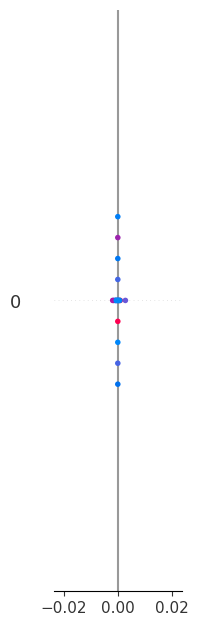

In [ ]:
import shap

explainer = shap.KernelExplainer(model.predict, X_train[:100])  # Predict function is used here

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test, nsamples=100)  # 'nsamples' controls the number of samples used for the approximation

# Plot the summary
shap.summary_plot(shap_values, X_test)


In [ ]:
feature_names = X_test.columns
print(feature_names)


Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59],
      dtype='int64')


In [ ]:
# feature_names = ["feature1", "feature2", "feature3", ...]



Feature '5' Statistics:
Mean: 0.09644762426614761
Variance: 0.002182300668209791
Standard Deviation: 0.04671509936451912


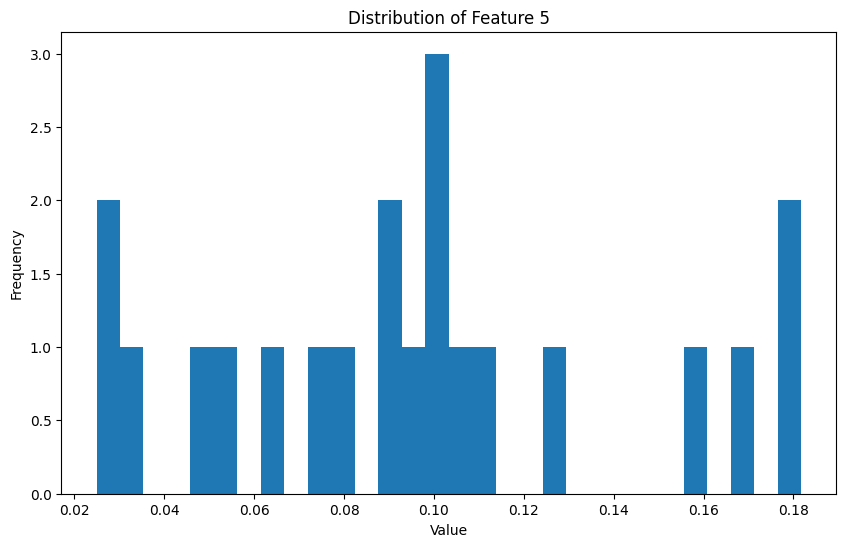

In [ ]:
import pandas as pd

# Assuming X_test is a pandas DataFrame
feature_index = 5  # Example feature index
feature_name = X_test.columns[feature_index] if isinstance(X_test, pd.DataFrame) else feature_index
feature_data = X_test.iloc[:, feature_index] if isinstance(X_test, pd.DataFrame) else X_test[:, feature_index]

# Check statistics
print(f"Feature '{feature_name}' Statistics:")
print(f"Mean: {feature_data.mean()}")
print(f"Variance: {feature_data.var()}")
print(f"Standard Deviation: {feature_data.std()}")

# Plot the feature data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(feature_data, bins=30)
plt.title(f'Distribution of Feature {feature_name}')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()



